<a href="https://colab.research.google.com/github/MigXDev/CS_Datos_I_DESAFIO_3/blob/main/TelecomX_LATAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challengue Alura - TelecomX

## Acerca del Desafio

**Telecom X – Parte 2: Predicción de Cancelación (Churn)**

📣 **Historia del Desafío**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 **Misión**

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 **Objetivos del Desafío**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 **Lo que vas a practicar**

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 **Ahora eres: Analista Junior de Machine Learning**

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

## 🛠️ Preparación de los Datos



### Importacion de Bibliotecas

In [61]:
# Importación de librerías esenciales
import pandas as pd # Manipulación de datos
import numpy as np # Manipulación de datos

import matplotlib.pyplot as plt # Visualización de Datos
import seaborn as sns # Visualización de Datos

# Para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Modelos que se utilizarán más adelante
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Advertencias (para limpiar outputs si es necesario)
import warnings
warnings.filterwarnings("ignore")

### Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.<br>

*   📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

#### 🧾 Carga y exploración del dataset

Comenzamos cargando la base de datos ya tratada. Se trata de un dataset de clientes de una empresa de telecomunicaciones. El objetivo será predecir si un cliente abandonará el servicio (`abandono_cliente`) en base a sus características.

A continuación se realiza una primera inspección.


In [62]:
Datos = '/content/TelecomX_Data_Base.csv'

In [63]:
# Cargamos el archivo CSV procesado
Df_base = pd.read_csv('/content/TelecomX_Data_Base.csv', sep=';')

In [64]:
# Visualizamos las primera fila
Df_base.head(1)

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
0,0002-ORFBO,No,Femenino,False,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Un año,Si,Cheque por correo,2.16,65.6,593.3


#### Inspección estructural

In [65]:
# Exploramos descripción estadística de variables numéricas
Df_base.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


In [66]:
# Exploración básica
print(f"Filas: {Df_base.shape[0]}, Columnas: {Df_base.shape[1]}")
print("\nTipos de datos:")
print(Df_base.dtypes.value_counts())
print("\nValores faltantes:")
print(Df_base.isnull().sum())

Filas: 7267, Columnas: 22

Tipos de datos:
object     17
float64     3
bool        1
int64       1
Name: count, dtype: int64

Valores faltantes:
id_cliente                   0
abandono_cliente             0
genero                       0
jubilado                     0
pareja                       0
dependientes                 0
meses_antiguedad             0
servicio_telefono            0
ad.multiples_lineas          0
servicio_internet            0
ad.seguridad_online          0
ad.respaldo_online           0
ad.proteccion_dispositivo    0
ad.soporte_tecnico           0
tv.streaming                 0
peliculas.streaming          0
contrato                     0
factura_digital              0
metodo_pago                  0
cargo.diario                 0
cargo.mensual                0
cargo.total                  0
dtype: int64


Análisis Univariado (EDA)

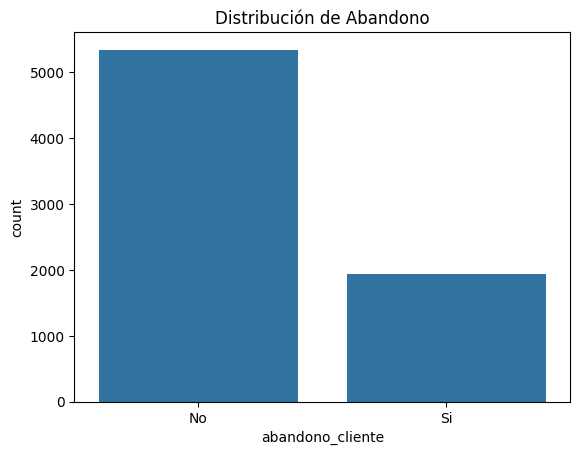

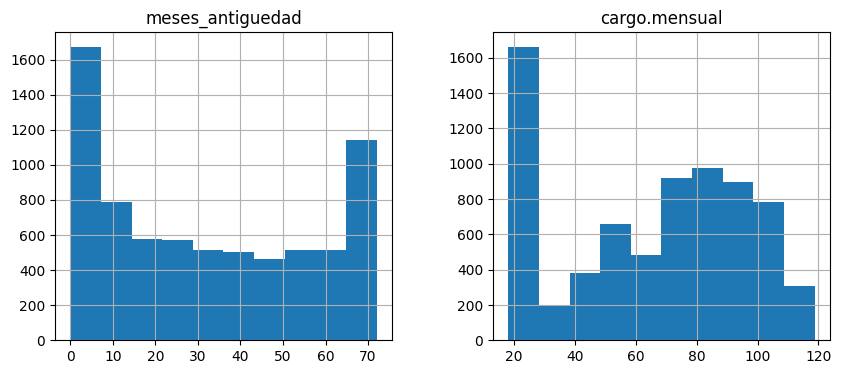

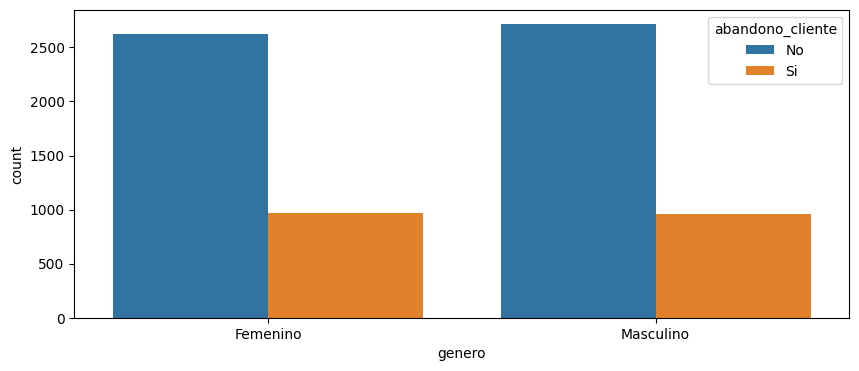

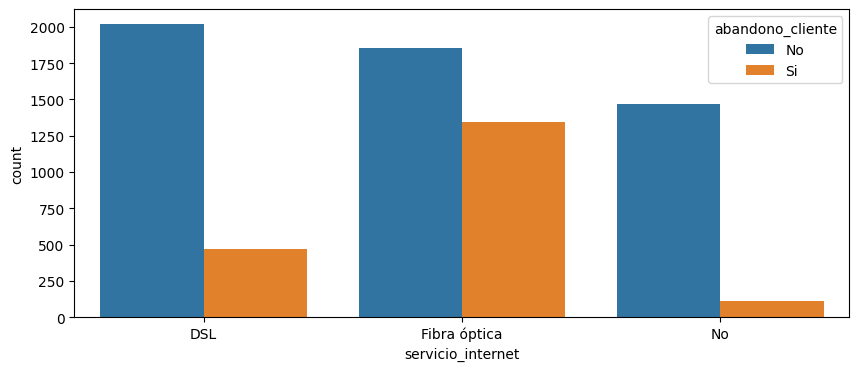

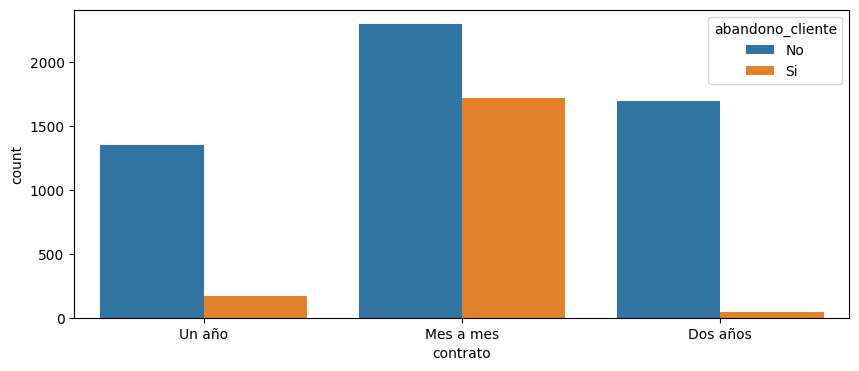

In [67]:
# Distribución de target
sns.countplot(x='abandono_cliente', data=Df_base)
plt.title('Distribución de Abandono');

# Análisis numéricas
num_cols = ['meses_antiguedad', 'cargo.mensual']
Df_base[num_cols].hist(figsize=(10, 4));

# Análisis categóricas
cat_cols = ['genero', 'servicio_internet', 'contrato']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='abandono_cliente', data=Df_base)

### Eliminación de Columnas Irrelevantes

Elimina columnas que **no aportan valor al análisis** o a **los modelos predictivos**, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [68]:
Df_base.drop(columns=['id_cliente', 'cargo.diario'],inplace=True)

**Eliminar columnas redundantes o problemáticas**

*   `id_cliente`: Identificador único sin valor predictivo.
*   `cargo.diario`: **Redundante**. Se calcula como cargo.mensual / 30 (aproximado). No añade información única.



In [69]:
# Conversión de target
Df_base['abandono_cliente'] = Df_base['abandono_cliente'].map({'Si': 1, 'No': 0})

`abandono_cliente`:

*   Si: `1`
*   No: `0`




In [70]:
Df_base.head(1)

,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,ad.seguridad_online,ad.respaldo_online,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.mensual,cargo.total
0,0,Femenino,False,Si,Si,9,Si,No,DSL,No,Si,No,Si,Si,No,Un año,Si,Cheque por correo,65.6,593.3


In [71]:
Df_base.columns

Index(['abandono_cliente', 'genero', 'jubilado', 'pareja', 'dependientes',
       'meses_antiguedad', 'servicio_telefono', 'ad.multiples_lineas',
       'servicio_internet', 'ad.seguridad_online', 'ad.respaldo_online',
       'ad.proteccion_dispositivo', 'ad.soporte_tecnico', 'tv.streaming',
       'peliculas.streaming', 'contrato', 'factura_digital', 'metodo_pago',
       'cargo.mensual', 'cargo.total'],
      dtype='object')

### División Train/Test (con variables categóricas)

*   `X` se usa para modelos no lineales (árboles, random forest, etc.)
*   `X_linear` se usa para modelos lineales (regresión logística, etc.) que requieren evitar multicolinealidad.

Modelo no lineal

Selección de features (X) y target (y):

In [72]:
# Dividir ANTES de transformaciones para evitar data leakage
X = Df_base.drop(columns=['abandono_cliente'], axis=1)
y = Df_base['abandono_cliente']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Mantener proporción de clases
    random_state=42
)

In [74]:
# Identificar tipos de columnas
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

# hace lo mismo solo que mas automatizado
"""
# Separamos las variables categoricas de las numericas
Categorias = ['genero', 'jubilado', 'pareja', 'dependientes', 'servicio_telefono',
              'ad.multiples_lineas', 'servicio_internet',
              'ad.seguridad_online', 'ad.respaldo_online',
              'ad.proteccion_dispositivo', 'ad.soporte_tecnico', 'tv.streaming',
              'peliculas.streaming', 'contrato', 'factura_digital', 'metodo_pago',]"""

"\n# Separamos las variables categoricas de las numericas\nCategorias = ['genero', 'jubilado', 'pareja', 'dependientes', 'servicio_telefono',\n              'ad.multiples_lineas', 'servicio_internet',\n              'ad.seguridad_online', 'ad.respaldo_online',\n              'ad.proteccion_dispositivo', 'ad.soporte_tecnico', 'tv.streaming',\n              'peliculas.streaming', 'contrato', 'factura_digital', 'metodo_pago',]"

In [75]:
categorical_cols

['genero',
 'jubilado',
 'pareja',
 'dependientes',
 'servicio_telefono',
 'ad.multiples_lineas',
 'servicio_internet',
 'ad.seguridad_online',
 'ad.respaldo_online',
 'ad.proteccion_dispositivo',
 'ad.soporte_tecnico',
 'tv.streaming',
 'peliculas.streaming',
 'contrato',
 'factura_digital',
 'metodo_pago']

**Explicación de manejo de categóricas:**<br>
La división se hace con las variables categóricas originales porque:
1.   No introduce data leakage
2.   `train_test_split` puede manejar objetos/strings sin problemas
3.   Las transformaciones se aplicarán después solo al training set

### Transformación de Datos

In [76]:
# Configurar preprocesador
one_hot = make_column_transformer(
                    (OneHotEncoder(drop='if_binary'), categorical_cols), # drop='if_binary' ➝ elimina una categoría si hay solo dos (evita duplicados).
                    remainder='passthrough', # remainder='passthrough' ➝ las columnas numéricas se dejan como están.
                    sparse_threshold=0,
                    force_int_remainder_cols=False
)

In [77]:
# Aplicar solo al training set
X_train_processed = one_hot.fit_transform(X_train)
X_test_processed = one_hot.transform(X_test)

In [83]:
columnas = one_hot.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

In [84]:
Df_No_lineal = pd.DataFrame(X_train_processed, columns=columnas_encoded)
Df_No_lineal_y = pd.DataFrame(y, columns=['abandono_cliente_si'])
Df_No_lineal = pd.concat([Df_No_lineal, Df_No_lineal_y], axis=1)
Df_No_lineal.head()

,genero_Masculino,jubilado_True,pareja_Si,dependientes_Si,servicio_telefono_Si,ad.multiples_lineas_No,ad.multiples_lineas_Si,ad.multiples_lineas_Sin servicio telefónico,servicio_internet_DSL,servicio_internet_Fibra óptica,...,contrato_Un año,factura_digital_Si,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automática),metodo_pago_Transferencia bancaria (automática),meses_antiguedad,cargo.mensual,cargo.total,abandono_cliente_si
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,88.55,179.25,NaN
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,82.30,214.40,NaN
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,21.0,96.80,2030.30,NaN
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,16.0,69.65,1043.30,NaN
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,35.0,73.45,2661.10,NaN


In [17]:
"""# Configurar preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Aplicar solo al training set
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)"""

### Balanceo de Clases (SMOTE)

In [78]:
# Aplicar SMOTE solo al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_processed, y_train)

print("\nDistribución después de balanceo:")
print(pd.Series(y_train_bal).value_counts())


Distribución después de balanceo:
abandono_cliente
1    4271
0    4271
Name: count, dtype: int64


### Análisis de Correlación (Post-balanceo)

In [80]:
# Crear DataFrame balanceado para análisis
feature_names = numeric_cols + list(one_hot.named_transformers_['cat'].get_feature_names_out(categorical_cols))
df_bal = pd.DataFrame(X_train_bal, columns=feature_names)
df_bal['abandono'] = y_train_bal

# Matriz de correlación
plt.figure(figsize=(16, 14))
corr_matrix = df_bal.corr()
sns.heatmap(corr_matrix[abs(corr_matrix) > 0.3], annot=True, cmap='coolwarm')

# Top correlaciones con target
target_corr = df_bal.corr()['abandono'].sort_values(ascending=False)
print(target_corr.head(10))

KeyError: 'cat'

### Modelado y Evaluación

In [20]:
# Entrenar modelo con datos balanceados
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

# Evaluar con test set original (sin balancear)
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1068
           1       0.58      0.55      0.56       386

    accuracy                           0.77      1454
   macro avg       0.71      0.70      0.71      1454
weighted avg       0.77      0.77      0.77      1454


AUC-ROC: 0.8168


Análisis de Importancia de Características

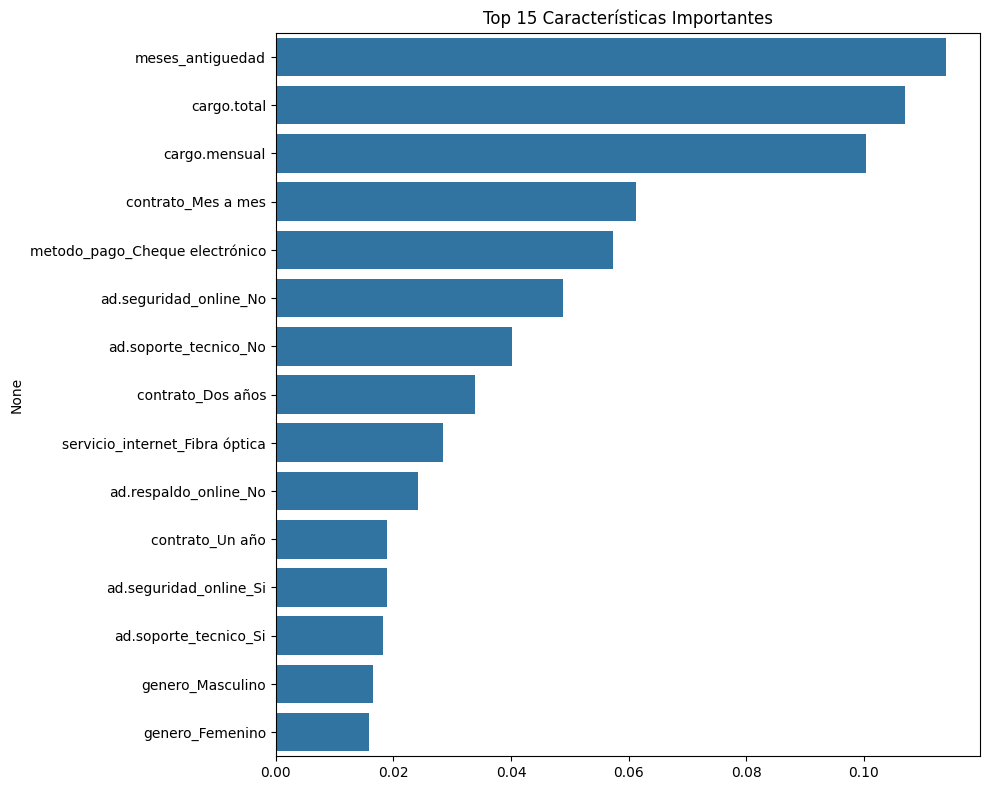

In [21]:
# Importancia de características
importances = pd.Series(model.feature_importances_, index=feature_names)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Características Importantes')
plt.tight_layout();

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada característica
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X_train_bal.astype(float), i)
                   for i in range(len(feature_names))]

# Filtrar características problemáticas (VIF > 5)
high_vif = vif_data[vif_data["VIF"] > 5]
print("Características con alta multicolinealidad:")
print(high_vif.sort_values("VIF", ascending=False))

Características con alta multicolinealidad:
                                              feature         VIF
4                                    genero_Masculino         inf
3                                     genero_Femenino         inf
5                                      jubilado_False         inf
8                                           pareja_Si         inf
7                                           pareja_No         inf
6                                       jubilado_True         inf
10                                    dependientes_Si         inf
11                               servicio_telefono_No         inf
12                               servicio_telefono_Si         inf
9                                     dependientes_No         inf
13                             ad.multiples_lineas_No         inf
16                              servicio_internet_DSL         inf
15        ad.multiples_lineas_Sin servicio telefónico         inf
14                             a

Modelo Lineal

In [24]:
X_lineal = X.copy()
y_lineal = y.copy()

In [25]:
X.columns

Index(['genero', 'jubilado', 'pareja', 'dependientes', 'meses_antiguedad',
       'servicio_telefono', 'ad.multiples_lineas', 'servicio_internet',
       'ad.seguridad_online', 'ad.respaldo_online',
       'ad.proteccion_dispositivo', 'ad.soporte_tecnico', 'tv.streaming',
       'peliculas.streaming', 'contrato', 'factura_digital', 'metodo_pago',
       'cargo.mensual', 'cargo.total'],
      dtype='object')

### Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de _machine learning_. Utiliza un método de codificación adecuado, como **one-hot encoding**.

Transformadores (`make_column_transformer`)

In [ ]:
one_hot = make_column_transformer(
                    (OneHotEncoder(drop='if_binary'), Categorias), # drop='if_binary' ➝ elimina una categoría si hay solo dos (evita duplicados).
                    remainder='passthrough', # remainder='passthrough' ➝ las columnas numéricas se dejan como están.
                    sparse_threshold=0,
                    force_int_remainder_cols=False
)

Modelo lineal

In [ ]:
one_hot_lineal = make_column_transformer(
                    (OneHotEncoder(drop='first'), Categorias), # drop='first' ➝ elimina la primera categoría de todas para evitar multicolinealidad (útil para regresión lineal).
                    remainder='passthrough', # remainder='passthrough' ➝ las columnas numéricas se dejan como están.
                    sparse_threshold=0,
                    force_int_remainder_cols=False
)

label_encoder = LabelEncoder()

Aplicar los transformadores:

In [ ]:
X = one_hot.fit_transform(X)
X_lineal = one_hot_lineal.fit_transform(X_lineal)

y = label_encoder.fit_transform(y)
y_lineal = label_encoder.fit_transform(y_lineal)

In [ ]:
X

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 9.00000e+00,
        6.56000e+01, 5.93300e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        5.03000e+01, 9.27500e+01],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 6.70000e+01,
        6.78500e+01, 4.62765e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 6.30000e+01,
        5.90000e+01, 3.70760e+03]])

Obtener nombres de columnas codificadas:

In [ ]:
columnas = one_hot.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

Transformacion a Df

In [ ]:
Df_No_lineal = pd.DataFrame(X, columns=columnas_encoded)
Df_No_lineal_y = pd.DataFrame(y, columns=['abandono_cliente_si'])
Df_No_lineal = pd.concat([Df_No_lineal, Df_No_lineal_y], axis=1)
Df_No_lineal.head()

,genero_Masculino,jubilado_True,pareja_Si,dependientes_Si,servicio_telefono_Si,ad.multiples_lineas_No,ad.multiples_lineas_Si,ad.multiples_lineas_Sin servicio telefónico,servicio_internet_DSL,servicio_internet_Fibra óptica,...,contrato_Un año,factura_digital_Si,metodo_pago_Cheque electrónico,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automática),metodo_pago_Transferencia bancaria (automática),meses_antiguedad,cargo.mensual,cargo.total,abandono_cliente_si
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,9.0,65.6,593.30,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,9.0,59.9,542.40,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,4.0,73.9,280.85,1
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,13.0,98.0,1237.85,1
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,83.9,267.40,1


In [ ]:
columnas = one_hot_lineal.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

In [ ]:
Df_lineal = pd.DataFrame(X_lineal, columns=columnas_encoded)
Df_y_lineal = pd.DataFrame(y_lineal, columns=['abandono_cliente_si'])
Df_lineal = pd.concat([Df_lineal, Df_y_lineal], axis=1)
Df_lineal.head()

,genero_Masculino,jubilado_True,pareja_Si,dependientes_Si,servicio_telefono_Si,ad.multiples_lineas_Si,ad.multiples_lineas_Sin servicio telefónico,servicio_internet_Fibra óptica,servicio_internet_No,ad.seguridad_online_Si,...,contrato_Mes a mes,contrato_Un año,factura_digital_Si,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito (automática),metodo_pago_Transferencia bancaria (automática),meses_antiguedad,cargo.mensual,cargo.total,abandono_cliente_si
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,9.0,65.6,593.30,0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,9.0,59.9,542.40,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,4.0,73.9,280.85,1
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,13.0,98.0,1237.85,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,3.0,83.9,267.40,1


### Verificación de la Proporción de Cancelación (Churn)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como **undersampling** o **oversampling**. En situaciones de fuerte desbalanceo, herramientas como **SMOTE** pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [26]:
Df_base['abandono_cliente'].value_counts()

,count
abandono_cliente,
No,5339
Si,1928


In [27]:
Df_base['abandono_cliente'].value_counts(normalize=True)

,proportion
abandono_cliente,
No,0.734691
Si,0.265309


### Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como **undersampling** o **oversampling**. En situaciones de fuerte desbalanceo, herramientas como **SMOTE** pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
"""from imblearn.over_sampling import SMOTE
from sklearn.inpute import SimpleImputer

X = Df_No_lineal.drop(columns=['abandono_cliente'], axis=1)
y = Df_No_lineal_y['abandono_cliente']

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = imputer.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)
"""

### Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como **KNN**, **SVM**, **Regresión Logística** y **Redes Neuronales**, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como **Decision Tree**, **Random Forest** y **XGBoost**, no son sensibles a la escala de los datos.

## 🎯 Correlación y Selección de Variables



### Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial **atención a las variables que muestran una mayor correlación con la cancelación**, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

### Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

- **Tiempo de contrato × Cancelación**
- **Gasto total × Cancelación**

Utiliza gráficos como **boxplots** o **scatter plots** para visualizar patrones y posibles tendencias.

## 🤖 Modelado Predictivo



### Separación de Datos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

- Un modelo puede requerir normalización, como **Regresión Logística** o **KNN**.
- El otro modelo puede no requerir normalización, como **Árbol de Decisión** o **Random Forest**.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

- **Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
- **Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

### Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

- Un modelo puede requerir normalización, como **Regresión Logística** o **KNN**.
- El otro modelo puede no requerir normalización, como **Árbol de Decisión** o **Random Forest**.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

- **Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
- **Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

### Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

- **Exactitud (Acurácia)**
- **Precisión**
- **Recall**
- **F1-score**
- **Matriz de confusión**

Después, realiza un análisis crítico y compara los modelos:

- ¿Cuál modelo tuvo el mejor desempeño?
- ¿Algún modelo presentó **overfitting** o **underfitting**? Si es así, considera las posibles causas y ajustes:
  - **Overfitting**: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
  - **Underfitting**: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

## 📋 Interpretación y Conclusiones Datos



### Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

* KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

* SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

* Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

### Conclusión

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.